# Extended modeling for NBA Dataset

In [1]:
import pandas as pd 
import numpy as np
import statsmodels.api as sm
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
from sklearn.linear_model import LinearRegression
from scipy import stats
from random import sample
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
games = pd.read_csv('C:/Users/michael.thabane/Documents/Springboard/Capstone2/nba-games/games.csv')
games_details = pd.read_csv('C:/Users/michael.thabane/Documents/Springboard/Capstone2/nba-games/games_details.csv')
players = pd.read_csv('C:/Users/michael.thabane/Documents/Springboard/Capstone2/nba-games/players.csv')
standings = pd.read_csv('C:/Users/michael.thabane/Documents/Springboard/Capstone2/nba-games/ranking.csv')

In [2]:
from sklearn.ensemble import RandomForestRegressor
from xgboost import XGBClassifier
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV

In [3]:
def mean_absolute_percentage_error(y_true, y_pred): 
    y_true, y_pred = np.array(y_true), np.array(y_pred)
    return np.mean(np.abs((y_true - y_pred) / y_true)) * 100

#### importing the data set from the data wrangling notebook

In [4]:
final_boxscore = pd.read_csv('C:/Users/michael.thabane/Documents/Springboard/Capstone2/final_boxscore.csv')

In [5]:
def mean_absolute_percentage_error(y_true, y_pred): 
    y_true, y_pred = np.array(y_true), np.array(y_pred)
    return np.mean(np.abs((y_true - y_pred) / y_true)) * 100

#### Isolating Lebron James career statistics

In [6]:
lebron_stats = final_boxscore.loc[final_boxscore['PLAYER_ID'] == 2544]
lebron_train2 = lebron_stats.iloc[91:]
lebron_test2 = lebron_stats.iloc[61:91]
lebron_train2_drop = lebron_train2.dropna()
y_train = lebron_train2_drop['PTS']
X_train = lebron_train2_drop[['PTSL5','PTSL3','MINL5','FGML5','FGAL5','FG_PCTL5','FG3ML5','FG3AL5','FG3_PCTL5','FTML5',
                       'FTAL5','FT_PCTL5','STLL5','PLUS_MINUSL5','TOT_PTSL5','DAYSOFF','YEAR']]
lebron_model_test2_drop = lebron_test2.dropna()
lebron_model_test2_drop = lebron_model_test2_drop[['PTSL5','PTSL3','MINL5','FGML5','FGAL5','FG_PCTL5','FG3ML5','FG3AL5',
                                                   'FG3_PCTL5','FTML5','FTAL5','FT_PCTL5','STLL5','PLUS_MINUSL5',
                                                   'TOT_PTSL5','DAYSOFF','YEAR']]

#### Fitting the model to the default parameter random forest regressor

In [7]:
randomforest = RandomForestRegressor()
randomforest.fit(X_train,y_train)

C:\Users\michael.thabane\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
                      max_features='auto', max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, n_estimators=10,
                      n_jobs=None, oob_score=False, random_state=None,
                      verbose=0, warm_start=False)

In [8]:
act = lebron_test2.dropna()
y_actual = act['PTS']
y_pred = randomforest.predict(lebron_model_test2_drop)

In [9]:
RMSE = np.sqrt(mean_squared_error(y_actual,y_pred))
r2 = r2_score(y_actual,y_pred)
MAPE = mean_absolute_percentage_error(y_actual,y_pred)
print(' RMSE =', RMSE,'\n','r squared = ', r2,'\n','MAPE = ', MAPE)

 RMSE = 6.553701244335143 
 r squared =  -0.18981501431253633 
 MAPE =  19.961677274960394


#### Parameter tuning the Random Forest Regressor for find the optimal parameters for the best performance

In [10]:
param_grid_RF = {'n_estimators': np.arange(100,1000,100), 'max_depth': np.arange(1,20,4), 
                 'min_samples_split': np.arange(2,21,5), 'min_samples_leaf': np.arange(1,15,2)}
RF_tune = GridSearchCV(randomforest,param_grid_RF)
RF_tune.fit(X_train,y_train)
print('Best n estimator: ', RF_tune.best_params_['n_estimators'])
print('Best max depth: ', RF_tune.best_params_['max_depth'])
print('Best min sample split: ', RF_tune.best_params_['min_samples_split'])
print('Best min sample leaf: ', RF_tune.best_params_['min_samples_leaf'])
print('Best Score: ', RF_tune.best_score_)

C:\Users\michael.thabane\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\model_selection\_split.py:1978: FutureWarning: The default value of cv will change from 3 to 5 in version 0.22. Specify it explicitly to silence this warning.
  warnings.warn(CV_WARNING, FutureWarning)


Best n estimator:  100
Best max depth:  5
Best min sample split:  7
Best min sample leaf:  9
Best Score:  0.010775602564707812


In [13]:
best_RF = RandomForestRegressor(n_estimators=100,max_depth=5,min_samples_split=7,min_samples_leaf=9)
best_RF.fit(X_train,y_train)

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=5,
                      max_features='auto', max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=9, min_samples_split=7,
                      min_weight_fraction_leaf=0.0, n_estimators=100,
                      n_jobs=None, oob_score=False, random_state=None,
                      verbose=0, warm_start=False)

In [14]:
y_pred_best = best_RF.predict(lebron_model_test2_drop)

In [16]:
RMSE_1 = np.sqrt(mean_squared_error(y_actual,y_pred_best))
r2_1 = r2_score(y_actual,y_pred_best)
MAPE_1 = mean_absolute_percentage_error(y_actual,y_pred_best)
print(' RMSE =', RMSE_1,'\n','r squared = ', r2_1,'\n','MAPE = ', MAPE_1)

 RMSE = 5.979204377507962 
 r squared =  0.009640293969979452 
 MAPE =  19.385443394148492


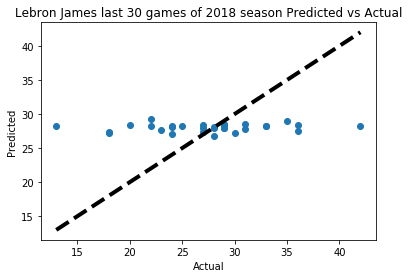

In [20]:
plt.scatter(y_actual,y_pred_best)
plt.plot([y_actual.min(), y_actual.max()], [y_actual.min(), y_actual.max()], 'k--', lw=4)
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.title('Lebron James last 30 games of 2018 season Predicted vs Actual')
plt.show()

In [ ]:
residuals = y_actual - y_pred_best
